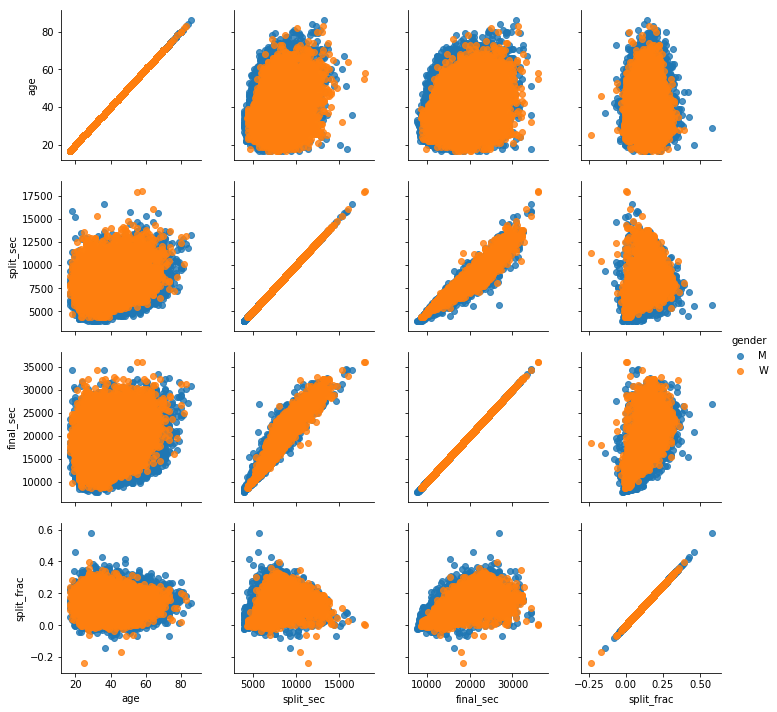

In [5]:
#(Q) Generate a PairGrid plot with the variables : age, split_sec, final_sec, split_frac with the hue: gender as 'g'
# 'g' should be used to map the scatter plot

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import time
from datetime import datetime, timedelta
warnings.filterwarnings('ignore')
%matplotlib inline

#data = pd.read_csv('marathon-data.csv')
#print(data.dtypes, '\n')
#print(data.head(), '\n')
# Convert time into the desired format
def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return timedelta(hours=h, minutes=m, seconds=s)

data = pd.read_csv('marathon-data.csv', converters={'split':convert_time, 'final':convert_time})
#print(data.dtypes, '\n')
"""That looks much better. For the purpose of our Seaborn plotting utilities, let’s next
add columns that give the times in seconds:"""
#(Q) repeat the same for the final attribute and create split_sec attribute
data['split_sec'] = data['split'] / np.timedelta64(1, 's')
#data.head()
#(Q) repeat the same for the final attribute and create final_sec attribute
data['final_sec'] = data['final'] / np.timedelta64(1, 's')
#plt.plot(data['split_sec'], data['final_sec'])
#print(data.sort_values('split_sec'))
"""Let’s create another column in the data, the split fraction, which measures the degree
to which each runner negative-splits or positive-splits the race:"""

# generating split fraction attribute using the formula
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
#sns.distplot(data['split_frac'])

#(Q) Find number of points having split fraction less than 0

#print('Total Number of records having split fraction less than 0 is : ', data[data['split_frac'] < 0].count()['split_frac'])
#sns.pairplot(data, hue = 'gender')

g = sns.PairGrid(data, hue="gender")
g.map(plt.scatter, alpha=0.8)
g.add_legend();